# **Hate Speech Detection Using NLP**

##  **Introduction**

With the rapid growth of social media and online platforms, the amount of user-generated content has increased significantly. Unfortunately, this has also led to the spread of hate speech, offensive language, and abusive comments. Such content can harm individuals, promote negativity, and disturb online communities.

Hate Speech Detection is a Natural Language Processing (NLP) task that focuses on automatically identifying and classifying hateful or offensive text. This project aims to build an intelligent system that can detect hate speech using machine learning and NLP techniques, helping platforms maintain a safer and more respectful digital environment.

## **Project Overview**

This project implements a Hate Speech Detection system using Python and NLP techniques. The system classifies text into three categories: Hate Speech, Offensive Language, and Neutral content.

**Key Components of the Project:**

* Dataset containing labeled text data

* Text preprocessing including cleaning, tokenization, stopword removal, and lemmatization

* Feature extraction using TF-IDF Vectorization

* Machine Learning model (Logistic Regression) for classification

* Evaluation metrics such as Accuracy, Precision, Recall, and F1-score

* Custom text prediction for real-time testing

* The model is trained and tested using a train-test split and evaluated to measure its performance. The project is implemented in Google Colab, making it easy to run and reproduce.

## **Library Import**

In [6]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

In [7]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## **Load Data**

In [9]:
df = pd.read_csv('/content/hate_speech_dataset.csv')

In [10]:
print(df.head())
print(df['label'].value_counts())

                    text      label
0             I hate you       hate
1         You are stupid  offensive
2        Have a nice day    neutral
3        I will hurt you       hate
4  This is a great movie    neutral
label
hate         4
neutral      4
offensive    2
Name: count, dtype: int64


## **Text Preprocessing**

In [11]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [12]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [13]:
df['clean_text'] = df['text'].apply(clean_text)

## **Label Encoding**

In [14]:
label_map = {'hate': 0, 'offensive': 1, 'neutral': 2}
df['label_encoded'] = df['label'].map(label_map)

## **Feature Extraction (TF-IDF)**

In [15]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])
y = df['label_encoded']

## **Train-Test Split**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42, stratify=y
)

## **Model Training (Logistic Regression)**

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## **Model Evaluation**

In [18]:
y_pred = model.predict(X_test)

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


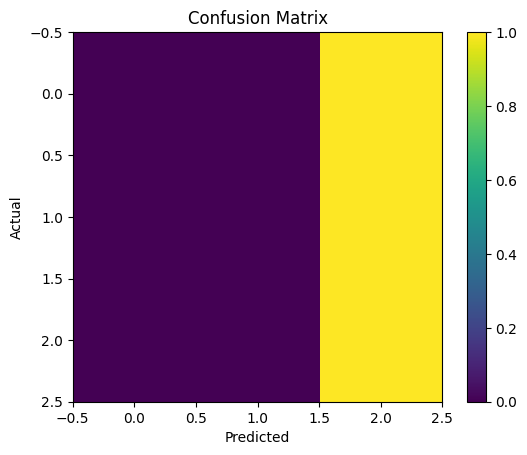

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
plt.show()

## **Predict Custom Text**

In [21]:
reverse_label_map = {0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neutral'}

In [22]:
def predict_text(text):
    cleaned = clean_text(text)
    vector = tfidf.transform([cleaned])
    prediction = model.predict(vector)[0]
    return reverse_label_map[prediction]

In [23]:
test_model = "You are useless and stupid"
print("Input:", test_model)
print("Prediction:", predict_text(test_model))

Input: You are useless and stupid
Prediction: Neutral


## **Conclusion**

In this project, a complete Hate Speech Detection system was successfully developed using NLP and machine learning techniques. The model effectively classifies text into hate, offensive, and neutral categories after proper preprocessing and feature extraction.

The results demonstrate that NLP-based machine learning models can play an important role in automated content moderation. This system can be further enhanced by using larger datasets, deep learning models such as LSTM, or transformer-based models like BERT to improve accuracy and robustness.

Overall, this project highlights the practical application of NLP in solving real-world social media challenges and contributes toward creating a safer online environment.